This repository contains the code for the detection of website elements using the yolo . We haven't used the pretrained model and trained the model from the scratch


In [ ]:
## Code for checking the GPU
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
## installing the ultralytics library for using YOLO V8
!pip install ultralytics
from IPython import display
display.clear_output()

In [ ]:
##Getting the current Working directory
import os
HOME=os.getcwd()
print(HOME)

/content


In [ ]:
##Importing YOLO
from ultralytics import YOLO

In [ ]:
## Getting our dataset from Roboflow
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="eF5RNFmqcUG4IJZCtPdwe1")
project = rf.workspace("roboflow-gw7yv").project("website-screenshots")
dataset = project.version(1).download("yolov8")

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.1.9, to fix: `pip install ultralytics==8.0.196`


In [ ]:
%cd {HOME}

/content


In [18]:
## Detection Task
!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=10 imgsz=256 batch=16

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/Website-Screenshots-1/data.yaml, epochs=10, time=None, patience=50, batch=16, imgsz=256, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=T

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


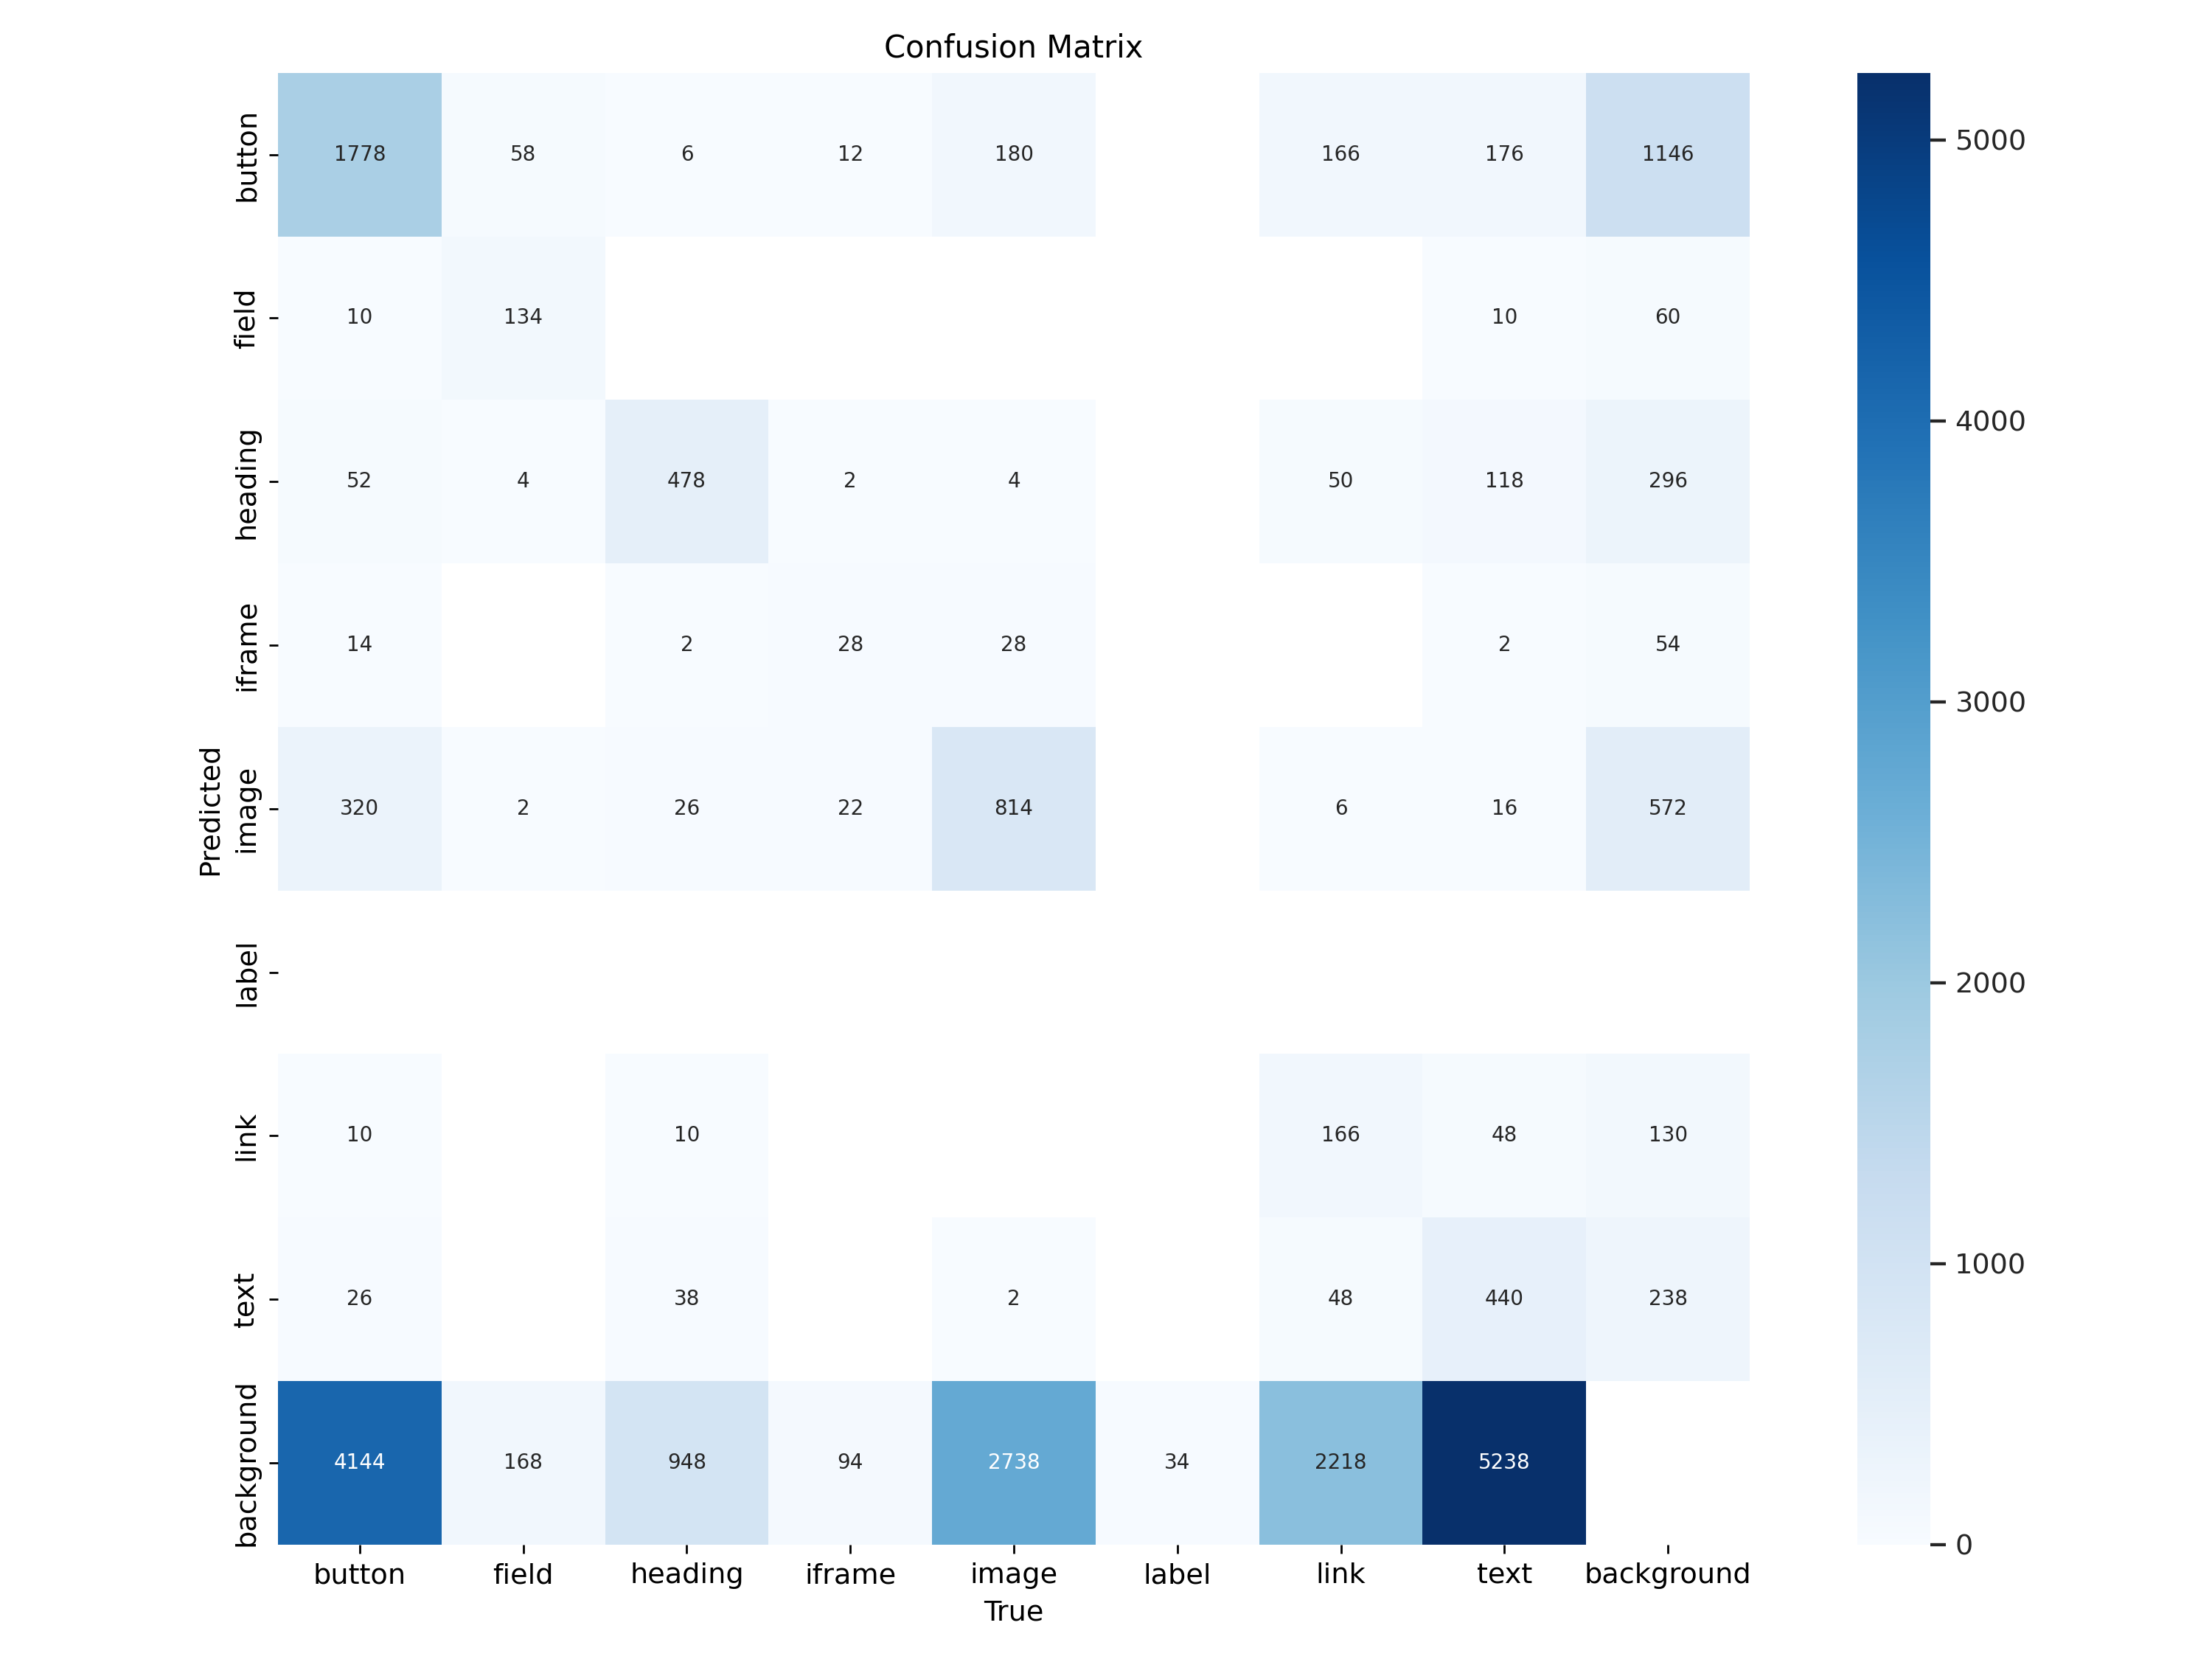

In [19]:
#Displaying the confusion matrix
from IPython.display import display, Image

image_path = f'{HOME}/runs/detect/train6/confusion_matrix.png'
img = Image(filename=image_path, width=700)
img

In [ ]:
%cd {HOME}

In [20]:
#Detection task
!yolo task=detect mode=val model={HOME}/runs/detect/train6/weights/best.pt data={dataset.location}/data.yaml

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/Website-Screenshots-1/valid/labels.cache... 482 images, 0 backgrounds, 0 corrupt: 100% 482/482 [00:00<?, ?it/s]
val: WARNING ⚠️ /content/Website-Screenshots-1/valid/images/bandsintown_com_png.rf.I19VlDFncZ0RifJhmfEU.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/Website-Screenshots-1/valid/images/bandsintown_com_png.rf.b8462344187a5cdffe24d70019fabd0a.jpg: 4 duplicate labels removed
val: WARNING ⚠️ /content/Website-Screenshots-1/valid/images/deondernemer_nl_png.rf.c00a7c65fab4356b887dea5c9e96e8f3.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/Website-Screenshots-1/valid/images/deondernemer_nl_png.rf.mVLu7hIaZ8VUCwbhSF6c.jpg: 1 duplicate labels removed
val: WARNING ⚠️ /content/Website-Screenshots-1/valid/images/flickr_com_png.rf.27963e0183770e78d58a8b78dc41715e.jpg: 2 duplicate label

In [22]:
!zip -r /content/val.zip /content/runs/detect/val

  adding: content/runs/detect/val/ (stored 0%)
  adding: content/runs/detect/val/val_batch2_pred.jpg (deflated 8%)
  adding: content/runs/detect/val/val_batch2_labels.jpg (deflated 9%)
  adding: content/runs/detect/val/val_batch0_pred.jpg (deflated 8%)
  adding: content/runs/detect/val/confusion_matrix_normalized.png (deflated 19%)
  adding: content/runs/detect/val/R_curve.png (deflated 10%)
  adding: content/runs/detect/val/PR_curve.png (deflated 8%)
  adding: content/runs/detect/val/F1_curve.png (deflated 9%)
  adding: content/runs/detect/val/confusion_matrix.png (deflated 19%)
  adding: content/runs/detect/val/P_curve.png (deflated 5%)
  adding: content/runs/detect/val/val_batch1_labels.jpg (deflated 7%)
  adding: content/runs/detect/val/val_batch1_pred.jpg (deflated 7%)
  adding: content/runs/detect/val/val_batch0_labels.jpg (deflated 9%)


In [ ]:
from google.colab import files
files.download("/content/file.zip")

In [24]:
!yolo task=detect mode=predict model=/content/runs/detect/train6/weights/best.pt conf=0.1 source=img.png

Ultralytics YOLOv8.1.9 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 168 layers, 11128680 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/img.png: 160x256 12 buttons, 8 fields, 1 heading, 2 iframes, 14 images, 7 texts, 122.2ms
Speed: 1.2ms preprocess, 122.2ms inference, 3.9ms postprocess per image at shape (1, 3, 160, 256)
Results saved to runs/detect/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


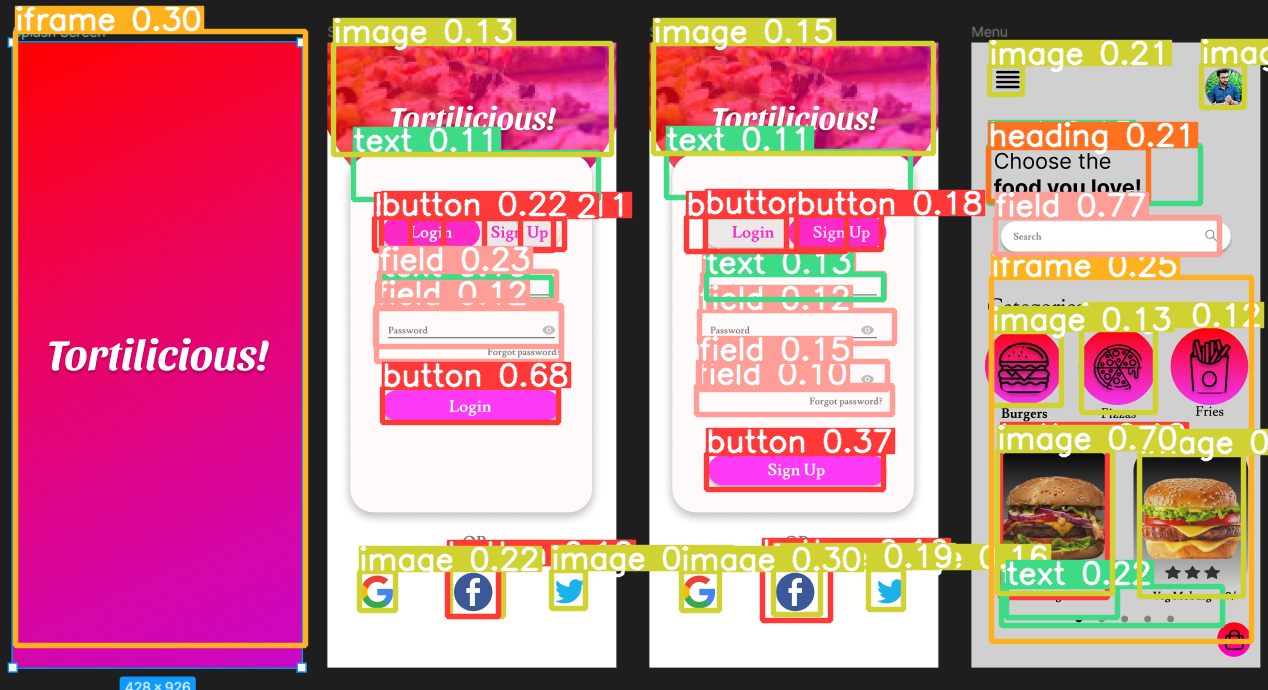

In [25]:
##results
Image(filename="runs/detect/predict/img.png",width=700)